# Importación de librerías y carga de datos

In [47]:
"""
Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from boruta import BorutaPy
from tpot import TPOTClassifier

path_santiago = r'C:\Users\santi\Universidad de Antioquia\VALERIA CADAVID CASTRO - Resultados_Armonizacion_BD'
path_veronica = r'C:\Users\veroh\OneDrive - Universidad de Antioquia\Resultados_Armonizacion_BD'

In [23]:
path = path_santiago

In [24]:
data = pd.read_feather(r'{path}\Datosparaorganizardataframes\Data_complete_ic_neuroHarmonize_G1.feather'
                       .format(path=path))

In [25]:
data

,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,crossfreq_C24_Mbeta3_Gamma,crossfreq_C24_Mgamma_Gamma,crossfreq_C25_Mdelta_Gamma,crossfreq_C25_Mtheta_Gamma,crossfreq_C25_Malpha-1_Gamma,crossfreq_C25_Malpha-2_Gamma,crossfreq_C25_Mbeta1_Gamma,crossfreq_C25_Mbeta2_Gamma,crossfreq_C25_Mbeta3_Gamma,crossfreq_C25_Mgamma_Gamma
0,0.186927,0.063808,0.082152,0.090405,0.176768,0.083747,0.122689,0.193504,0.397332,0.083051,...,0.175592,0.660878,0.123818,0.016349,0.026090,0.035218,0.069914,0.018539,0.089809,0.279009
1,0.303421,0.100647,0.211855,0.121404,0.106804,0.054898,0.086855,0.014116,0.353285,0.110086,...,0.093619,0.261124,0.146237,0.035522,0.223624,0.147397,0.087232,0.014432,0.044372,0.096536
2,0.309907,0.099577,0.087386,0.085328,0.114095,0.032154,0.098118,0.173435,0.458282,0.133867,...,0.149689,0.419643,0.072678,0.015694,0.022912,0.037863,0.053656,0.010985,0.106195,0.184318
3,0.108792,0.072188,0.164554,0.159235,0.172716,0.050523,0.177457,0.094535,0.166930,0.123981,...,0.078410,0.193753,0.082567,0.033294,0.079884,0.098578,0.071779,0.013630,0.083936,0.142481
4,0.206763,0.091237,0.091652,0.094457,0.153634,0.057392,0.135485,0.169380,0.286844,0.122263,...,0.049441,0.101489,0.078834,0.046049,0.061689,0.073515,0.052699,0.008886,0.044686,0.089752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.126269,0.085563,0.131598,0.065546,0.143790,0.046511,0.362139,0.038584,0.205020,0.108680,...,0.045326,0.109461,0.082015,0.141946,0.272191,0.154794,0.051662,0.011231,0.128292,0.243913
143,0.175882,0.070602,0.130953,0.141161,0.217872,0.071974,0.127013,0.064544,0.234591,0.087727,...,0.026151,0.049714,0.090795,0.057919,0.120392,0.100469,0.083024,0.015510,0.031198,0.064425
144,0.085603,0.068231,0.417529,0.099008,0.073792,0.043209,0.060917,0.151710,0.072220,0.061290,...,0.073712,0.224798,0.072781,0.102536,0.213331,0.174010,0.076355,0.018067,0.065522,0.138696
145,0.201935,0.063966,0.125468,0.223393,0.149015,0.032869,0.073776,0.129578,0.446617,0.140551,...,0.061358,0.199445,0.131020,0.044999,0.132653,0.267126,0.177317,0.015834,0.049969,0.110130


In [26]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 147 | caracteristicas: 557


# Preprocesamiento

## Análisis exploratorio de datos

In [32]:
for group in data['group'].unique():
        
        print('{} : {}'.format(group, (data['group']==group).sum()))

G1 : 49
Control : 98


In [33]:
data.describe()

,power_C14_Delta,power_C14_Theta,power_C14_Alpha-1,power_C14_Alpha-2,power_C14_Beta1,power_C14_Beta2,power_C14_Beta3,power_C14_Gamma,power_C15_Delta,power_C15_Theta,...,crossfreq_C24_Mbeta3_Gamma,crossfreq_C24_Mgamma_Gamma,crossfreq_C25_Mdelta_Gamma,crossfreq_C25_Mtheta_Gamma,crossfreq_C25_Malpha-1_Gamma,crossfreq_C25_Malpha-2_Gamma,crossfreq_C25_Mbeta1_Gamma,crossfreq_C25_Mbeta2_Gamma,crossfreq_C25_Mbeta3_Gamma,crossfreq_C25_Mgamma_Gamma
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.183748,0.080780,0.149222,0.144321,0.152437,0.056073,0.117317,0.116103,0.265128,0.106917,...,0.081591,0.231259,0.108253,0.058105,0.128244,0.120430,0.096665,0.022292,0.084997,0.172090
std,0.083319,0.032318,0.081127,0.078630,0.055206,0.023521,0.047499,0.087989,0.105793,0.038181,...,0.058975,0.263286,0.027788,0.033925,0.090059,0.091412,0.076421,0.020196,0.066475,0.153898
min,0.034128,0.021356,0.029124,0.034314,0.045217,0.024785,0.041340,-0.159345,0.060262,0.030883,...,0.016605,0.035185,0.054425,0.011792,0.006935,0.012117,0.018340,0.003866,0.014585,0.031526
25%,0.115707,0.061608,0.091327,0.087963,0.111700,0.040883,0.088494,0.076972,0.181331,0.079853,...,0.045326,0.087019,0.090571,0.033166,0.060700,0.057318,0.052012,0.011358,0.043694,0.084635
50%,0.173592,0.074742,0.128918,0.126409,0.144360,0.050972,0.109295,0.111680,0.247388,0.102125,...,0.061965,0.147631,0.105426,0.049090,0.108752,0.101472,0.076355,0.017367,0.063911,0.135151
75%,0.236741,0.093637,0.197310,0.186041,0.176051,0.066306,0.137082,0.145919,0.344551,0.123990,...,0.100256,0.240962,0.124855,0.075144,0.187009,0.160083,0.117980,0.026331,0.106432,0.205840
max,0.514918,0.224500,0.482734,0.528539,0.325770,0.171666,0.362139,0.566807,0.519410,0.257018,...,0.433171,1.979020,0.189054,0.197069,0.454054,0.444413,0.606438,0.194359,0.374769,1.205670


In [34]:
data.groupby(by='group').describe().T

group                               Control         G1
power_C14_Delta            count  98.000000  49.000000
                           mean    0.191006   0.169233
                           std     0.085846   0.076815
                           min     0.045354   0.034128
                           25%     0.126121   0.105929
...                                     ...        ...
crossfreq_C25_Mgamma_Gamma min     0.037968   0.031526
                           25%     0.079453   0.096536
                           50%     0.125734   0.148974
                           75%     0.168739   0.239197
                           max     1.205670   0.586838

[4408 rows x 2 columns]

In [36]:
# eliminación de columnas con datos faltantes

for column in data.columns:

    if data[column].isna().sum() != 0:

        print('{} : {}'.format(column, (data[column].isna().sum())))
        data.drop(column, axis=1, inplace=True)

In [37]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 147 | caracteristicas: 552


In [38]:
# Se mapean las clases 

clases_mapeadas = {label:idx for idx,label  
                   in enumerate(np.unique(data['group']))}

data.loc[:,'group'] = data.loc[:,'group'].map(clases_mapeadas) 
print(clases_mapeadas)

{'Control': 0, 'G1': 1}


In [39]:
print(data.dtypes.unique())

[dtype('float64') dtype('O') dtype('int64')]


In [40]:
data.select_dtypes('O')

,database,participant_id,visit,condition,sex
0,BIOMARCADORES,sub-G1024,V0,CE,M
1,BIOMARCADORES,sub-G1023,V0,CE,F
2,BIOMARCADORES,sub-G1022,V0,CE,F
3,BIOMARCADORES,sub-G1021,V0,CE,F
4,BIOMARCADORES,sub-G1019,V0,CE,F
...,...,...,...,...,...
142,CHBMP,sub-CBM00167,V0,protmap,M
143,CHBMP,sub-CBM00156,V0,protmap,F
144,CHBMP,sub-CBM00147,V0,protmap,F
145,CHBMP,sub-CBM00283,V0,protmap,F


In [41]:
data.groupby(by='sex').describe().T

sex                                       F          M
power_C14_Delta            count  79.000000  68.000000
                           mean    0.181543   0.186310
                           std     0.075967   0.091634
                           min     0.061581   0.034128
                           25%     0.110649   0.125566
...                                     ...        ...
crossfreq_C25_Mgamma_Gamma min     0.038953   0.031526
                           25%     0.096945   0.065800
                           50%     0.135687   0.133209
                           75%     0.170433   0.217572
                           max     0.813485   1.205670

[4376 rows x 2 columns]

In [20]:

sexo_mapeado = {label:idx for idx,label
                in enumerate(np.unique(data['sex']))}

data.loc[:,'sex'] = data.loc[:,'sex'].map(sexo_mapeado) 
print(sexo_mapeado)

{0: 0, 1: 1}


In [42]:
# data pasa a ser el arreglo únicamente con los datos númericos

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)

data.shape

(147, 547)

In [43]:
# Se elimina la columna, para ponerla al final

target = data.pop('group')
data.insert(len(data.columns), target.name, target)

## Selección de caracteristicas

### Creación de datasets de entrenamiento y test

In [44]:
X = data.values[:,:-1]
y = data.values[:,-1]
print(X.shape)
print(y.shape)

(147, 546)
(147,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.2, # Test de 20%
    random_state=1, # Semilla
    stratify=data.values[:,-1]) # que se mantenga la proporcion en la división

### Mapa de calor de correlación

<AxesSubplot:>

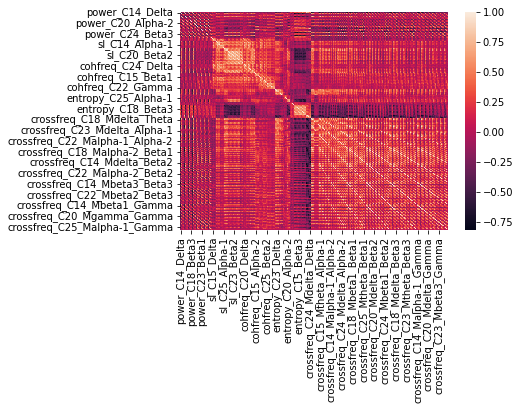

In [46]:
sns.heatmap(data.corr())

### Árboles de decisión (Grid Search)

In [90]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 30)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini',  'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
               }

In [91]:
forestclf_grid = RandomForestClassifier()

rf_random = RandomizedSearchCV(
                              estimator=forestclf_grid,
                              param_distributions=random_grid,
                              n_iter=100,
                              cv=10,
                              verbose=2,
                              random_state=10,
                              n_jobs=-1
                              )

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\santi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\santi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\santi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\santi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\santi\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_s

In [62]:
best_selected = rf_random.best_estimator_

In [92]:
best_selected.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1000,
                       random_state=RandomState(MT19937) at 0x1D44EE45640)

In [93]:
predicted = best_selected.predict(X_test)

In [94]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

Classification report for classifier RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1000,
                       random_state=RandomState(MT19937) at 0x1D44EE45640):
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        20
         1.0       0.80      0.40      0.53        10

    accuracy                           0.77        30
   macro avg       0.78      0.68      0.69        30
weighted avg       0.77      0.77      0.74        30




In [95]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )

In [96]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.66666667 0.66666667 0.66666667 0.83333333 0.58333333 0.58333333
 0.5        0.54545455 0.63636364 0.81818182]


In [97]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.650 +/- 0.103


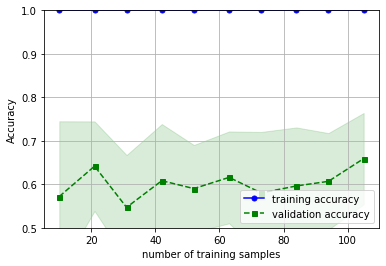

In [98]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_train,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Árboles de decisión (Boruta)

In [101]:
feat_selector = BorutaPy(
                        verbose=2,
                        estimator=best_selected,
                        max_iter=100
                        )

In [102]:
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	546
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	543
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	543
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2


BorutaPy(estimator=RandomForestClassifier(bootstrap=False, min_samples_split=5,
                                          n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x1D44EE45640),
         random_state=RandomState(MT19937) at 0x1D44EE45640, verbose=2)

In [103]:
selected_features = []
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", data.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
        selected_features.append(data.columns[i])


------Support and Ranking for each feature------
Passes the test:  power_C18_Gamma  - Ranking:  1
Passes the test:  power_C20_Gamma  - Ranking:  1
Passes the test:  power_C24_Gamma  - Ranking:  1


In [105]:
X_transform = feat_selector.transform(X_train)

In [106]:
best_selected.fit(X_transform, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1000,
                       random_state=RandomState(MT19937) at 0x1D44EE45640)

In [107]:
selected_features = [data.columns.get_loc(c) for c in selected_features if c in data]
selected_features

[23, 31, 55]

In [108]:
predicted = best_selected.predict(X_test[:,selected_features])

In [109]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1000,
                       random_state=RandomState(MT19937) at 0x1D44EE45640):
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        20
         1.0       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.87      0.82      0.84        30
weighted avg       0.87      0.87      0.86        30




In [110]:
scores = cross_val_score(estimator=best_selected,
                        X=X_transform,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

In [111]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.75       0.75       0.83333333 0.75       0.66666667 0.83333333
 0.75       0.72727273 0.81818182 0.72727273]


In [112]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.761 +/- 0.050


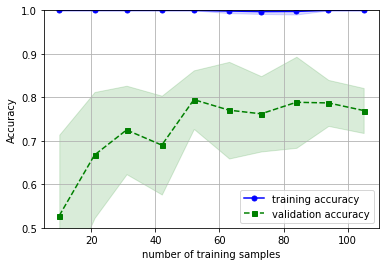

In [113]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_transform,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Selección de caracteristicas con árboles de decisión

 1) power_C20_Gamma                0.033194
 2) power_C18_Gamma                0.018040
 3) power_C25_Gamma                0.014938
 4) power_C24_Gamma                0.013264
 5) power_C14_Gamma                0.012954
 6) crossfreq_C20_Mgamma_Gamma     0.011257
 7) power_C23_Gamma                0.010774
 8) sl_C18_Theta                   0.009992
 9) cohfreq_C15_Delta              0.009856
10) cohfreq_C25_Beta1              0.009662
11) sl_C15_Beta3                   0.008962
12) sl_C15_Alpha-1                 0.007761
13) cohfreq_C18_Beta2              0.007594
14) cohfreq_C25_Theta              0.007586
15) sl_C18_Delta                   0.007488
16) power_C15_Gamma                0.007423
17) crossfreq_C25_Mgamma_Gamma     0.007155
18) cohfreq_C15_Theta              0.006483
19) cohfreq_C23_Beta3              0.006257
20) cohfreq_C18_Delta              0.006241
21) cohfreq_C18_Beta1              0.005886
22) crossfreq_C14_Mgamma_Gamma     0.005609
23) crossfreq_C14_Mbeta3_Beta3  

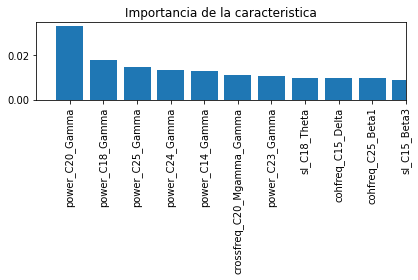

In [116]:
nombres_columnas = data.columns[:-1]
best_selected.fit(X_train, y_train)
features_scores = best_selected.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]
sorted_names = []

for f in range(X_train.shape[1]):

    sorted_names.append(nombres_columnas[index[f]])
    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))
    
plt.title('Importancia de la caracteristica')

plt.bar(range(X_train.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, 10])

plt.tight_layout()

plt.show()

In [119]:
top_5_features = [data.columns.get_loc(c) for c in sorted_names[:5]
                 if c in data
                 ]
top_5_features

[31, 23, 63, 55, 7]

In [130]:
acc_per_feature = []
std_per_feature = []
for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_selected.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        x=range(1,len(sorted_names)),
        y=acc_per_feature
        ) 


KeyboardInterrupt: 

In [132]:
len(acc_per_feature)

477

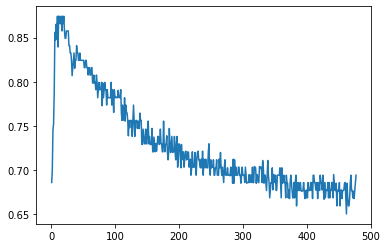

In [134]:
plt.plot(
        range(1,478),
        acc_per_feature
        ) 


### SVM (Grid Search)

In [74]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8018115942028985

Generation 2 - Current best internal CV score: 0.8192028985507246

Generation 3 - Current best internal CV score: 0.8192028985507246

Generation 4 - Current best internal CV score: 0.8192028985507246

Generation 5 - Current best internal CV score: 0.8192028985507246

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=2, max_features=0.45, min_samples_leaf=1, min_samples_split=12, n_estimators=100, subsample=0.45)


TPOTClassifier(generations=5, random_state=1, verbosity=2)

### TPOT

In [27]:
pipeline_optimizer = TPOTClassifier()

In [30]:
pipeline_optimizer = TPOTClassifier(
                                    generations=5,
                                    population_size=int(X.shape[0]*0.4),
                                    cv=10,
                                    random_state=10,
                                    verbosity=3,
                                    n_jobs=-1
                                    )

In [31]:
pipeline_optimizer.fit(X_train, y_train)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/348 [00:00<?, ?pipeline/s]

Skipped pipeline #15 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=1 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 1 - Current Pareto front scores:

-1	0.7128787878787

TPOTClassifier(cv=10, generations=5, n_jobs=-1, population_size=58,
               random_state=10, verbosity=3)

In [32]:
print(pipeline_optimizer.score(X_test, y_test))

0.7666666666666667
